In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import sys
import scipy.stats
import pylab as plt
from IPython import display
import pylab as plt

In [4]:
sys.path.append('../codes')

In [5]:
from VMSfunctions.model import *
from VMSfunctions.Common import *
from VMSfunctions.DataGenerator import *

### Generates Empirical Data

We want a notebook that does the following:
1. create a list of chemical
2. create a new mass spec object, takes chemicals
3. create a new controller, takes mass spec
4. write mzml files

Load densities trained on 4 beer data (see [loader_kde](loader_kde.ipynb)).

In [6]:
ps = load_obj('../models/peak_sampler_4_beers.p')

c:\users\joewa\.virtualenvs\simulator-g4ninw5e\lib\site-packages\sklearn\base.py:251: UserWarning:

Trying to unpickle estimator KernelDensity from version 0.20.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.



Load chromatogram data exported from R

In [7]:
xcms_output = '../models/beer_ms1_peaks.csv.gz'
min_ms1_intensity = 2E5
min_rt = 3*60
max_rt = 21*60
cl = ChromatogramLoader(xcms_output, min_ms1_intensity, min_rt, max_rt)

Processing exported chromatograms
0


../codes\VMSfunctions\Common.py:49: RuntimeWarning:

divide by zero encountered in double_scalars



5000
10000
15000
20000
25000
30000
35000
40000
45000
Loaded 24002 UnknownChemicals/Chromatograms


Creates a liquid chromatography column, with 3 `KnownChemical`.

In [8]:
# formula_strings = ['C8H10N4O2', 'C6H9N3O2', 'C5H9NO2']
# column = KnownColumn('LC', formula_strings, ps)

Creates a liquid chromatography column, with 10 `UnknownChemical`.

In [9]:
num_chemicals = 1000
column = UnknownColumn('LC', num_chemicals, ps, cl)

Plot some chemicals

UnknownChemical mz=101.4280 rt=846.41 max_intensity=1.00


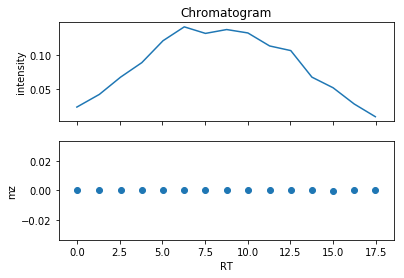

UnknownChemical mz=361.5676 rt=717.95 max_intensity=1.00


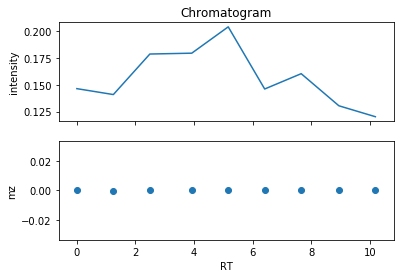

UnknownChemical mz=324.7875 rt=320.42 max_intensity=1.00


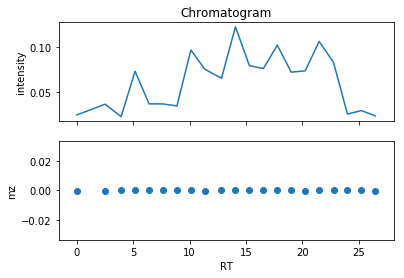

UnknownChemical mz=183.5740 rt=393.06 max_intensity=1.00


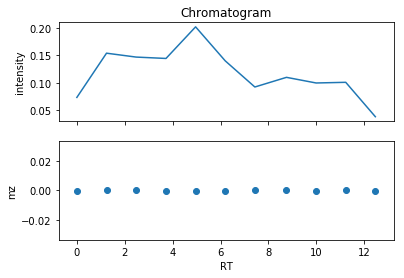

UnknownChemical mz=151.3256 rt=535.30 max_intensity=1.00


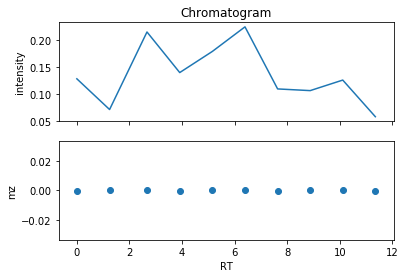

UnknownChemical mz=411.4270 rt=836.33 max_intensity=1.00


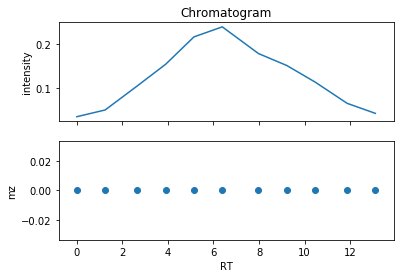

UnknownChemical mz=124.6623 rt=889.47 max_intensity=1.00


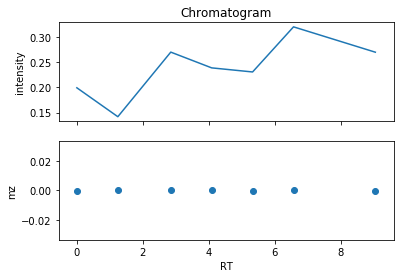

UnknownChemical mz=171.3943 rt=1151.41 max_intensity=1.00


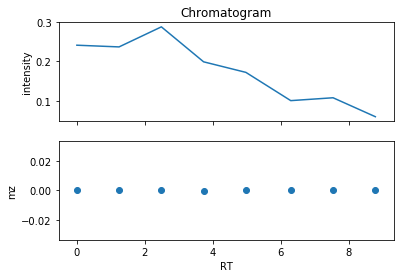

UnknownChemical mz=266.0906 rt=799.79 max_intensity=1.00


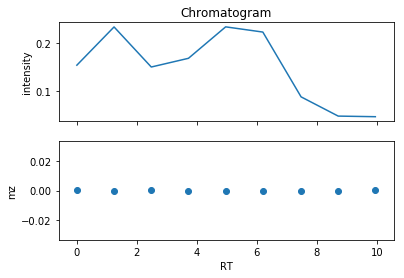

UnknownChemical mz=212.8920 rt=628.68 max_intensity=1.00


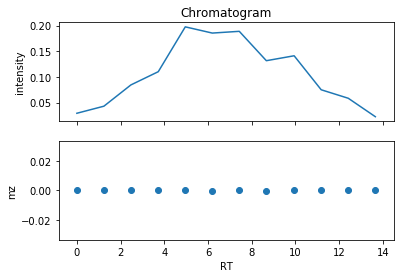

In [10]:
def plot_chromatogram(chrom):
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(chrom.rts, chrom.intensities)
    axarr[0].set_title('Chromatogram')
    axarr[0].set_ylabel('intensity')
    axarr[1].scatter(chrom.rts, chrom.mzs)
    axarr[1].set_ylabel('mz')
    axarr[1].set_xlabel('RT')    
    plt.show()

for chem in column.chemicals[0:10]:
    print(chem)
    plot_chromatogram(chem.chromatogram)

Connect the column to a simple mass spec controller that returns a scan every time we call it.

In [11]:
def scan_handler(scan):
    if scan.num_peaks > 0:
        print(scan)
    
def acquisition_open():
    print('Start acquisition')
    
def acquisition_closing():
    print('End acquisition')

In [12]:
scan_parameters = {
    'isolation_windows': [[(0, 1e3)]], # TODO: change to dictionary?
    'ms_level': 1
}    
mass_spec = IndependentMassSpectrometer(column, scan_parameters)
mass_spec.register(MassSpectrometer.MS_SCAN_ARRIVED, scan_handler)
mass_spec.register(MassSpectrometer.ACQUISITION_STREAM_OPENING, acquisition_open)
mass_spec.register(MassSpectrometer.ACQUISITION_STREAM_CLOSING, acquisition_closing)
mass_spec.run(max_rt)

Start acquisition
Scan 177 -- num_peaks=1 rt=177.00 ms_level=1
Scan 178 -- num_peaks=1 rt=178.00 ms_level=1
Scan 179 -- num_peaks=1 rt=179.00 ms_level=1
Scan 180 -- num_peaks=1 rt=180.00 ms_level=1
Scan 181 -- num_peaks=1 rt=181.00 ms_level=1
Scan 182 -- num_peaks=1 rt=182.00 ms_level=1
Scan 183 -- num_peaks=2 rt=183.00 ms_level=1
Scan 184 -- num_peaks=4 rt=184.00 ms_level=1
Scan 185 -- num_peaks=6 rt=185.00 ms_level=1
Scan 186 -- num_peaks=7 rt=186.00 ms_level=1
Scan 187 -- num_peaks=10 rt=187.00 ms_level=1
Scan 188 -- num_peaks=11 rt=188.00 ms_level=1
Scan 189 -- num_peaks=11 rt=189.00 ms_level=1
Scan 190 -- num_peaks=13 rt=190.00 ms_level=1
Scan 191 -- num_peaks=15 rt=191.00 ms_level=1
Scan 192 -- num_peaks=15 rt=192.00 ms_level=1
Scan 193 -- num_peaks=15 rt=193.00 ms_level=1
Scan 194 -- num_peaks=14 rt=194.00 ms_level=1
Scan 195 -- num_peaks=16 rt=195.00 ms_level=1
Scan 196 -- num_peaks=16 rt=196.00 ms_level=1
Scan 197 -- num_peaks=15 rt=197.00 ms_level=1
Scan 198 -- num_peaks=14 r

Scan 414 -- num_peaks=21 rt=414.00 ms_level=1
Scan 415 -- num_peaks=21 rt=415.00 ms_level=1
Scan 416 -- num_peaks=23 rt=416.00 ms_level=1
Scan 417 -- num_peaks=23 rt=417.00 ms_level=1
Scan 418 -- num_peaks=22 rt=418.00 ms_level=1
Scan 419 -- num_peaks=24 rt=419.00 ms_level=1
Scan 420 -- num_peaks=23 rt=420.00 ms_level=1
Scan 421 -- num_peaks=22 rt=421.00 ms_level=1
Scan 422 -- num_peaks=25 rt=422.00 ms_level=1
Scan 423 -- num_peaks=25 rt=423.00 ms_level=1
Scan 424 -- num_peaks=26 rt=424.00 ms_level=1
Scan 425 -- num_peaks=26 rt=425.00 ms_level=1
Scan 426 -- num_peaks=26 rt=426.00 ms_level=1
Scan 427 -- num_peaks=26 rt=427.00 ms_level=1
Scan 428 -- num_peaks=26 rt=428.00 ms_level=1
Scan 429 -- num_peaks=23 rt=429.00 ms_level=1
Scan 430 -- num_peaks=23 rt=430.00 ms_level=1
Scan 431 -- num_peaks=22 rt=431.00 ms_level=1
Scan 432 -- num_peaks=22 rt=432.00 ms_level=1
Scan 433 -- num_peaks=21 rt=433.00 ms_level=1
Scan 434 -- num_peaks=23 rt=434.00 ms_level=1
Scan 435 -- num_peaks=19 rt=435.00

Scan 767 -- num_peaks=18 rt=767.00 ms_level=1
Scan 768 -- num_peaks=18 rt=768.00 ms_level=1
Scan 769 -- num_peaks=17 rt=769.00 ms_level=1
Scan 770 -- num_peaks=18 rt=770.00 ms_level=1
Scan 771 -- num_peaks=17 rt=771.00 ms_level=1
Scan 772 -- num_peaks=19 rt=772.00 ms_level=1
Scan 773 -- num_peaks=18 rt=773.00 ms_level=1
Scan 774 -- num_peaks=19 rt=774.00 ms_level=1
Scan 775 -- num_peaks=21 rt=775.00 ms_level=1
Scan 776 -- num_peaks=22 rt=776.00 ms_level=1
Scan 777 -- num_peaks=21 rt=777.00 ms_level=1
Scan 778 -- num_peaks=22 rt=778.00 ms_level=1
Scan 779 -- num_peaks=21 rt=779.00 ms_level=1
Scan 780 -- num_peaks=21 rt=780.00 ms_level=1
Scan 781 -- num_peaks=21 rt=781.00 ms_level=1
Scan 782 -- num_peaks=22 rt=782.00 ms_level=1
Scan 783 -- num_peaks=22 rt=783.00 ms_level=1
Scan 784 -- num_peaks=23 rt=784.00 ms_level=1
Scan 785 -- num_peaks=24 rt=785.00 ms_level=1
Scan 786 -- num_peaks=23 rt=786.00 ms_level=1
Scan 787 -- num_peaks=22 rt=787.00 ms_level=1
Scan 788 -- num_peaks=22 rt=788.00

Scan 1023 -- num_peaks=22 rt=1023.00 ms_level=1
Scan 1024 -- num_peaks=21 rt=1024.00 ms_level=1
Scan 1025 -- num_peaks=19 rt=1025.00 ms_level=1
Scan 1026 -- num_peaks=20 rt=1026.00 ms_level=1
Scan 1027 -- num_peaks=19 rt=1027.00 ms_level=1
Scan 1028 -- num_peaks=17 rt=1028.00 ms_level=1
Scan 1029 -- num_peaks=18 rt=1029.00 ms_level=1
Scan 1030 -- num_peaks=17 rt=1030.00 ms_level=1
Scan 1031 -- num_peaks=17 rt=1031.00 ms_level=1
Scan 1032 -- num_peaks=16 rt=1032.00 ms_level=1
Scan 1033 -- num_peaks=18 rt=1033.00 ms_level=1
Scan 1034 -- num_peaks=18 rt=1034.00 ms_level=1
Scan 1035 -- num_peaks=16 rt=1035.00 ms_level=1
Scan 1036 -- num_peaks=16 rt=1036.00 ms_level=1
Scan 1037 -- num_peaks=18 rt=1037.00 ms_level=1
Scan 1038 -- num_peaks=18 rt=1038.00 ms_level=1
Scan 1039 -- num_peaks=16 rt=1039.00 ms_level=1
Scan 1040 -- num_peaks=16 rt=1040.00 ms_level=1
Scan 1041 -- num_peaks=18 rt=1041.00 ms_level=1
Scan 1042 -- num_peaks=18 rt=1042.00 ms_level=1
Scan 1043 -- num_peaks=18 rt=1043.00 ms_

Set up a simple controller

Acquisition open


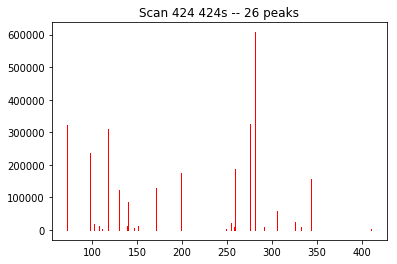

72.03769792104296 323877.74500571494
97.23571461861688 237718.82192481981
102.36619070708616 16742.482464909146
107.05517273892424 11016.342670610957
110.68996193822116 2233.2165636630757
118.00385677602875 310758.4456186974
129.48525846216714 121416.10603040282
138.5925577646956 11500.539665366507
139.27937964308424 85737.30148441897
146.54248933153457 4801.906611959608
151.35316006569897 12843.032723388567
170.42247404743244 129702.1634062887
170.59216728303906 11945.335675961502
199.00758089141294 174284.90545635857
249.24231929500155 4066.1964001944543
254.54950103806203 21402.44389886472
257.26049389504044 9131.116631841838
258.24109970253977 186345.580224064
275.7287593877472 326075.6755892982
280.7244898282124 607423.5513607761
291.4248756485194 10014.764454139773
305.8248477104615 56762.54103104321
324.9394342547354 23793.33494394102
332.53650752357316 9017.276595240468
343.3529844627021 155633.28391714074
410.44927118189776 4072.6313845051764


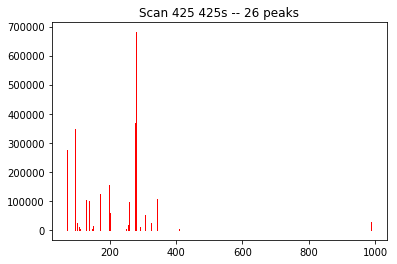

72.0376094797496 274657.07086029125
96.64197281461642 4429.445577175283
97.23571461861688 346609.80231606134
102.36618584578844 23235.56048264414
107.05514821154048 9922.28212587276
110.6899431466091 2314.72254694906
129.4854718171364 104533.84107359013
139.2794413196776 98748.25039011653
146.54250947236793 4657.647264975579
151.35321929445345 12628.363711895961
170.421991947964 122657.45594174386
170.59215233089498 10908.478635884092
199.00760554143693 154680.4674479444
202.58561651114138 57720.06947130608
249.24238426118728 4254.890333707586
254.54962449104823 18405.360804492157
257.2604484590502 9963.52166680829
258.24108736722127 96459.57582081547
275.7288120894738 366600.5130123067
280.7246135766674 680313.989567352
291.4248917887802 8907.93651314241
305.8248246483725 52911.35211455625
324.9394536909693 24923.84669524913
343.3529785908429 106454.01532192745
410.44963975168196 4695.920176106713
989.0061048527461 27102.77076246299


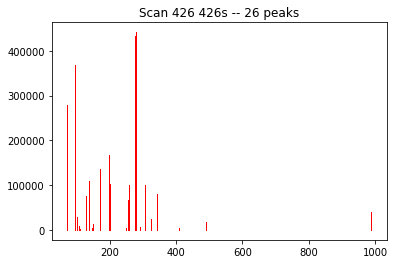

72.03748542907712 279723.9165326417
96.64213937010175 6208.114644179359
97.23565616265246 367743.4638948085
102.36619952343635 28155.679868889292
107.05514808634835 9396.975893454914
110.6900378932557 2126.4677948317785
129.4853468054711 76593.74636075988
139.2793842552634 108755.67545310967
146.54251112405603 4846.884098125578
151.35321929445345 13545.151471221703
170.42215871972374 136459.19616841752
199.00763015238692 167538.9079684487
202.5855556764408 102263.37108246807
249.24234749302022 4638.563293201509
254.54859646036033 65830.36494053375
258.2410328309425 100470.82445593836
275.728751688256 433206.299141113
280.7247009414599 441473.4284743462
291.4248917887802 6947.185877827779
305.8248051976824 40722.883940591666
307.6556837311486 100069.33032651669
324.9394536909693 25411.45392870483
343.35292948774077 80057.48174433994
410.44946787963755 4571.199178054505
489.1726206561024 17990.06490483167
989.0054859647986 39276.72323867905


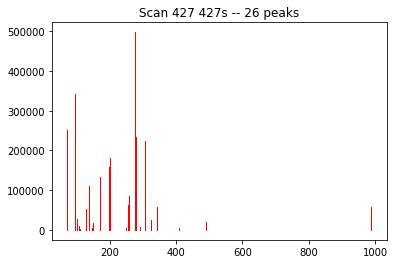

72.03748542907712 251174.88032454747
96.64181833848636 8660.518375498497
97.2356034575118 341765.0723712311
102.36620773278527 28318.222085425565
107.05518375046564 9806.264249618715
110.69003819287109 2197.610762339918
129.4850875083268 53682.1226308587
139.27939136809638 110332.55807561426
146.54252342953106 5423.180338941405
151.35327769694663 16679.17883046561
170.4225120026811 132376.79828333014
199.0076834560491 159145.35040106293
202.58567995321158 180427.72139114697
249.24237453000399 5633.211794357006
254.54839660314136 62487.37510500892
258.241049335351 84841.42462294447
275.7286535609947 497807.2598935289
280.7246924996407 233806.61499969824
291.42496940963576 7404.101054518963
305.8248159056052 36720.65056839221
307.65549693648603 223590.06916579805
324.93945148954924 25786.733230013306
343.3528373417302 56545.204297603916
410.4492715304599 4463.008952748613
489.1725634710515 20033.591727931962
989.0053037448881 57305.4047492108


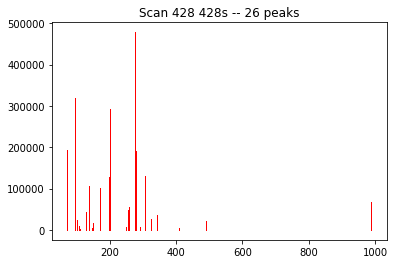

72.03737331815698 193937.92504446043
96.64067417589293 11787.754834445288
97.23558877554885 319031.07379202725
102.36616102949702 23361.042225210345
107.05525204427894 8646.289268598422
110.69003053976857 2427.8810649461493
129.4848727333044 43473.5616756776
139.27940896090547 107036.84046998317
146.5425137273078 5707.897023606161
151.35314751414577 15714.8730268842
170.42279210935158 102613.76995965469
199.00770549431505 128587.38642777801
202.58563081057392 293526.9716862122
249.2423905433848 6334.2319114198035
254.54845949655433 49307.66691834114
258.24109797187026 54321.49987815844
275.72865253417893 478288.1553089754
280.7246087431863 192058.65558735578
291.42487716311945 6810.943429550985
305.824827595535 36660.156070396726
307.65504784580503 131540.25264117194
324.9394268785993 26679.56558444458
343.3528636290391 37179.32247679797
410.4492700379342 4110.256404703189
489.1726043341518 22415.860418958644
989.0052686389071 67289.27189970328


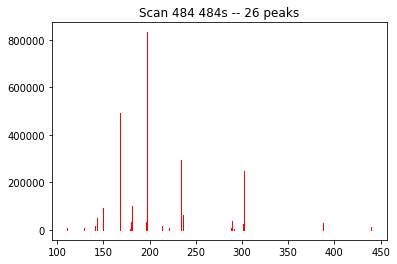

110.6900243555312 6098.782418231954
128.86047037946665 7431.724005618122
140.95977552878549 15534.889650277451
143.2712079742137 16706.514800861372
143.30926046214668 51002.40363872753
146.54264369102435 42.27299399355342
149.32751034053769 92646.9368151981
167.6564429520628 492647.7229864098
178.72457015833595 5719.09203201051
180.1484878492721 33439.498787070894
180.65377662565913 102590.06475644521
195.66742567742196 34996.90742098519
196.94585223920794 14389.307953567175
197.3005782464287 832415.0107450753
212.9988036309569 15296.888139347324
220.65879153960762 6744.612472073708
233.76752364706704 292442.12666863186
235.9867736070327 64679.23013966647
288.1711490974392 6469.941348177552
289.1937630283884 37871.663924578745
289.27214855147946 15107.551887793721
291.4247911532472 4726.503459616019
300.83838947953257 22964.982958638157
302.2055046696581 249237.29190102845
387.9678477122014 28028.42612641695
440.1272152118171 13671.53835120663


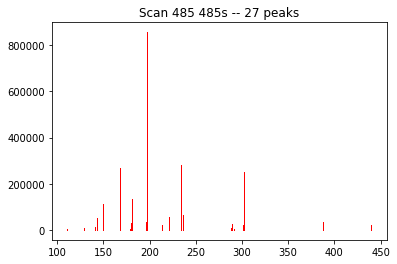

110.69009381891055 5658.08240578846
128.86034209393017 10049.15062681709
140.95975144229928 14223.83188999051
143.2712695015895 16840.8926327102
143.30925875679586 49975.99017965129
146.54247301105713 70.4581485536555
149.32712797464106 114058.56205184491
167.65673775186787 268981.0159341497
178.72371982930582 5022.83995412055
180.1484509625944 30190.103474275325
180.6538333935501 133437.14046320773
195.66741775724486 35743.43290947513
196.94596522322664 20107.27934303537
197.29897694567742 856721.2593605238
212.99918011877773 19719.56247126092
220.6586231772051 5592.1278758344215
220.77271685187674 56542.054784733555
233.76751404179342 281290.44366028294
235.98690371232743 66638.72602514239
288.17110007321753 6187.658677320147
289.1939332066595 27722.68823498344
289.2721354325675 10140.347471198225
291.4248522862168 4838.002360580912
300.8381318954731 21233.252284092756
302.20527125174146 250227.1260476296
387.9678699910366 32406.390007563492
440.12728752835346 19751.342210327522


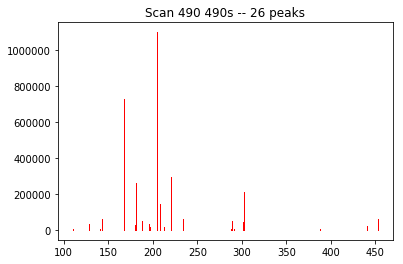

110.69006806121077 4359.373220938827
128.86030703272345 31555.292472873396
140.95983035369386 6451.557443438118
143.27118029546565 20495.884660418855
143.30926808666328 60902.430041532156
146.54271039921096 54.80600658355107
167.65645560405724 729885.5733166545
180.14850104484827 24744.82431980892
180.6541624401129 260668.6275875686
188.2823418772667 48661.095592136546
195.66739755041613 30883.217984067254
196.94588069336697 16936.388301393814
204.36175674276942 1099195.8282805725
207.61788079772109 143450.51225444488
212.99923512200164 18353.69838039669
220.65867022825162 6292.021447967018
220.77266436540623 293131.5876967952
233.76751260872018 61138.06904649081
288.17134114582797 5447.295379103386
289.1935766451258 48232.370898539695
291.4248744122529 5875.92478965314
300.83812828337324 45379.20314272198
302.20525062193576 210975.24743318927
387.96786267430923 6911.689661418644
440.12727825213864 24084.67877022409
452.4521257630659 61315.05851845313


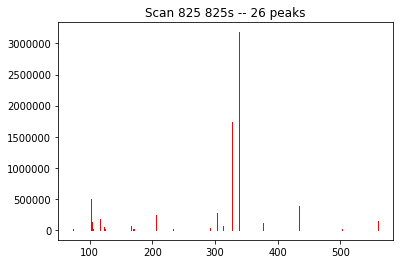

74.25472805307533 14889.632603394162
87.49187720258642 3928.844196362373
102.72880992545498 491196.4261309583
104.3041389581958 123626.71567868118
105.68158789851351 18960.007538384856
117.00152386781667 171829.0618065283
122.57452808968002 44640.44034414633
124.23824210952074 11482.912941598719
138.7176868689417 3025.5959115056867
164.5627620474537 6579.763435546413
165.9590776600804 8986.101340926845
166.31361748201624 65321.884487183444
168.71400082673142 7866.226391339402
171.34590376273428 17696.557134139184
205.78730974104775 239934.4795103016
232.861888017771 1016.3347539160122
233.7617321285662 10703.619310135216
292.57177728095246 25701.182692239123
303.17413017825464 277008.00931281224
313.3773856159917 65538.27150633797
327.5435791039533 1731690.3057349683
339.0313435230742 3180684.6268616114
376.78138952015274 114341.0801566862
434.23277072834696 379980.357033746
502.27136754380285 21220.75520841704
559.766505852391 136108.03627923125


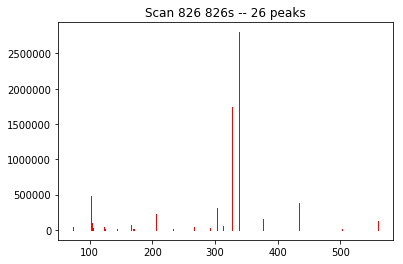

74.25486739324575 35755.30463715085
102.72882169921193 483974.68638561555
104.3042840988905 102386.28383224107
105.68152031562752 23212.141308713075
122.57456973801915 42706.77773167715
124.2384360258226 13306.274320430059
138.71764336280384 3008.30440197916
143.3846988373245 8367.52129641649
164.5635703896442 2591.9505827121325
165.9589305874145 8378.95798052985
166.31360516660948 66913.24225186862
168.71404133005012 7221.273934314493
171.34619559749794 18199.648698544806
205.78721985531237 230560.90723297457
232.861724319604 1528.7865985060182
233.76185826454676 8200.817818881042
266.6522697109443 46805.808486660964
292.5718247421935 28574.03160659607
303.17413573628176 307755.1466837369
313.3774837432529 59113.44633890534
327.54349762838 1741779.3942697379
339.03186077016056 2800157.0023901397
376.7813583621426 151066.12515145523
434.23277924640786 388361.03277664573
502.27087965978 16468.704303311853
559.7664517979177 121590.75744530378


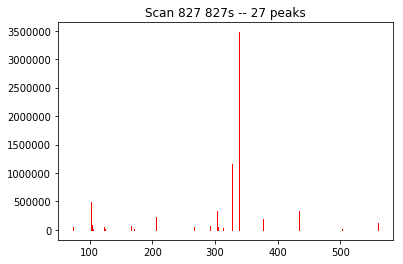

74.25492118379576 46007.49085339806
102.7287921641985 487639.2863890505
104.30445661644735 80191.6747351251
105.68149566491832 24097.71634033604
122.57456973801915 46191.68344696982
124.2383643662099 15362.909719249325
138.71759985666594 2991.0128924526325
143.3847894238034 6634.537532728945
164.56352112801625 2842.904998644525
165.95916501820244 8068.343802237754
166.31355428108628 70200.72521406706
168.71403057685137 7161.500843644658
171.3461080075834 13867.0119798239
205.78724324745698 233784.14612032264
232.8614120193747 1821.6270467973961
233.7615484133132 4298.0811946506965
266.65215996309615 46705.76941225272
292.5718045730033 71969.73992034097
303.1741386507629 329983.3780025033
305.65067739263515 50540.16601131258
313.3776110346393 27946.637842955486
327.5435090298258 1156654.131058113
339.03234016948664 3472234.9412146364
376.78133918319753 185554.00471712984
434.23277924640786 331593.7753097576
502.27032394566277 8832.505578766577
559.7663572568969 120887.78739251505


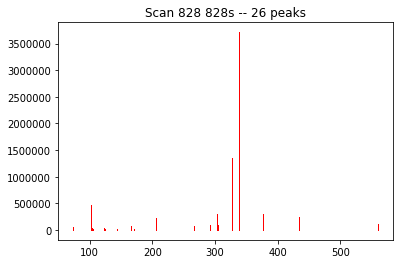

74.25492601484375 50817.34943768204
102.72877033566856 473093.4943837003
104.30424792826231 37228.72410756331
105.681558783976 19229.16906199938
122.57449886414476 44991.144445608086
124.23833484565907 15365.749263001153
138.71755635052807 2973.7213829261063
143.3848845345401 8318.976185373629
164.563215004299 7022.968401384269
165.95922386745144 8932.520561130026
166.31351395176856 70748.36959241584
168.71396153742305 7258.288810587499
171.34535029037028 20053.080692107265
205.78728833493895 231582.90497237127
232.86114151707093 1075.2967379424333
233.76138655925337 2135.570124932928
266.6521722785037 68295.69023324794
292.57177138904495 89570.4220734845
303.1741509463222 291578.67582401424
305.65068396818634 89156.68727219569
327.5436312816664 1355394.472652526
339.03265347879943 3712180.830945515
376.78133918319753 297126.74947579793
434.23277924640786 241722.660402367
502.2695844243833 7454.813190833876
559.7663572568969 102450.10539103634


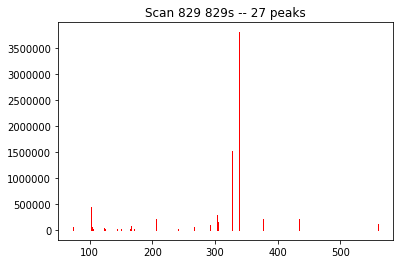

74.25493452812506 58580.7440659061
102.72876592163246 446255.22835619445
104.3043149938047 58221.3052215625
105.68153632158992 13950.317785981024
122.57460157974496 40308.741781793404
124.23836698182195 14166.637053916627
138.7175218022219 3263.7026368063825
143.38488223644742 17463.332575257387
149.50218352962864 18707.664340749005
164.56344412883138 8736.709857504322
165.95906611118588 9767.059075807101
166.31348576349157 71941.41776631195
168.71416525168357 7120.107565746811
171.3454181106938 24160.061430212907
205.78729265806598 207674.31574862654
232.86154871681293 1500.2800501763134
233.76169494221736 3076.4472336206422
240.87443560010297 11965.70350881721
266.6520986551327 49671.19187849799
292.57177386776567 91793.96021579602
303.1742122785072 284512.942833704
305.6508994880461 151007.47403643912
327.5435148764096 1518564.3645794925
339.03313770501654 3796907.2983600865
376.7812799297369 217515.29567040803
434.23277924640786 213688.8862513827
559.7664158094628 115875.85910245


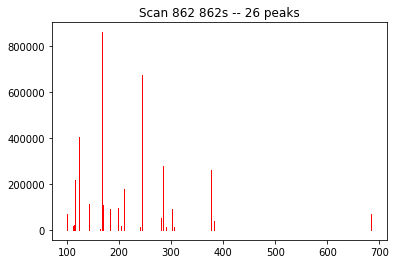

100.4207236345692 66996.41171412129
112.74813442846146 17072.376296011727
113.80343931467362 20122.787557152405
115.43715061490431 215014.2773443166
123.98456940241951 402194.73952648236
143.38446295998796 111544.33554294474
164.5645260589182 1930.340868324452
167.30277507553797 858571.2258034039
170.08525821409617 108619.68235642712
183.71446364159618 91324.74207938042
197.3946751066226 33974.2958781037
197.58850905497775 94718.09070922872
203.60329698348394 18305.137213954178
209.20020809643088 176379.95717605762
209.9618698621987 22203.34665917493
214.67057250344084 1268.7347348281137
240.51063298470237 13878.718458124686
244.34225201084607 674666.5383535319
280.6252965352585 53164.838350608545
284.4901799677157 279699.44390845567
289.8355822236934 10987.175249910355
302.52502386350295 92833.4800704017
306.39704115963406 13152.647750853466
376.9134904893679 261338.8319198769
382.48678289383344 39599.80241362507
684.682663802527 68168.99152462996


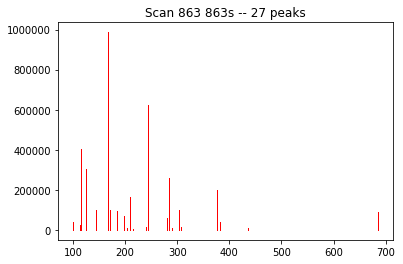

100.42080499776883 37682.886644237435
112.74810925463719 22689.839856057817
113.80346315653144 19818.760654510465
115.43709633904217 405027.9902427455
123.98454783522656 305804.7306185777
143.38434449112927 101490.18945983674
164.56412779303997 1790.180184005892
167.30285611962722 986377.0947577237
170.08549054999528 100016.19425771301
183.7143447377918 94243.26266187889
197.394597068576 39962.390892368625
197.5885844070228 71562.73846778595
203.60313086552685 9245.982157606686
209.20019929602682 162059.17341024478
209.96185777605442 22650.745469673977
214.67052332120392 4101.3536836662515
240.5107178158667 13599.961930547872
244.34220647966944 621179.5073767174
280.62524260936306 58161.45009448575
284.49022286391005 259681.3828349539
289.8355619024096 12008.229103689213
302.5250151812964 101265.17338190759
306.39792491699217 12105.861915799378
376.9136170068811 196892.15586215365
382.48642665751356 37569.87045177164
436.40579605113106 8449.906204102028
684.6825346366805 87179.37438643

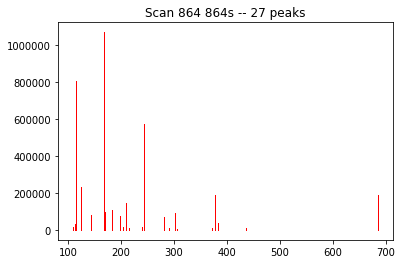

109.91693065728572 13884.178507480432
112.74812141879467 31434.81639482524
113.80346706821926 19736.220445776857
115.43721919563714 806980.203375828
123.98449873420628 231602.9018845799
143.38441757124758 80592.57276537089
164.5632679264865 1640.9353557742988
167.30294873416494 1068777.867403376
170.08549054999528 98071.37010236488
183.71417229304438 106534.55838564398
197.39448280831687 46800.94794376821
197.58873171999892 73779.35573035566
203.60302340926629 14148.742006957591
209.19994715620263 147009.80153138924
209.96183121580566 19419.548282071184
214.6705789938348 9012.120678394323
240.51081580961596 14122.172712564301
244.3422774507819 571506.2725368723
280.62496078476346 68338.97390115033
289.8355449757439 12951.766744472998
302.5250148900853 92196.36012588443
306.3989404340892 6789.822063598104
371.9249168286268 9792.213142123896
376.91339325100546 187562.51609180678
382.4864846737985 34859.208830739386
436.405943844036 10937.809555412628
684.6828304451918 187284.1945325009


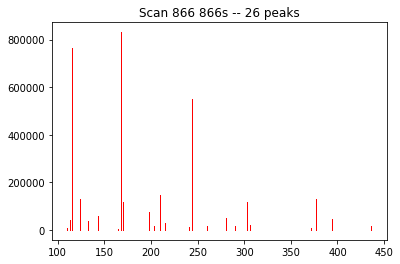

109.91700883976668 9300.535447533479
112.7479946348032 39857.60059791388
115.43729733370658 765716.268103622
123.98453143260741 130262.84665589679
132.00450163467272 38163.24038414237
143.38450498804505 57119.636119793366
164.56293035303068 1792.6653158856452
167.30264937473254 830779.5288613767
170.08549057558608 119160.47909828677
197.3944774881522 37987.659501333255
197.58854162870455 74867.86476252346
203.60311096655747 15396.15019620415
209.19987779439512 146861.31574819723
209.9618810644532 20965.922827198796
214.67054367477425 29010.297000848634
240.5106872202973 12976.714818028704
244.34219803734277 548633.8696915256
260.39036146775516 18529.847064249578
280.62534622697854 51341.51149283064
289.8355247611471 14632.931296493758
302.5249936277241 118891.57453033641
306.39784644037377 18834.644476348007
371.9249338052469 10143.929112978813
376.91352150186094 131477.94813705757
394.31870139038773 45222.68089681058
436.40509075648146 16062.225153184076


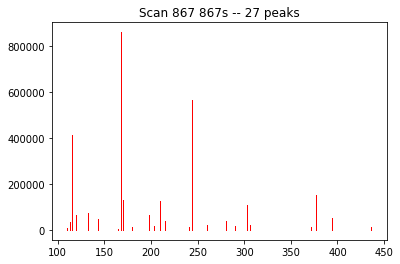

109.91697192334169 7481.703107922613
112.74805631139657 36355.189949871834
115.43726674545384 413335.11005358724
119.12586409391415 63523.56255039301
132.0053098402764 72447.51871178087
143.38465429573046 45911.5799243438
164.56276156630278 1868.5302959413184
167.30268614289957 858407.0230337406
170.08560497030643 128640.3600986666
179.11154067686724 13596.334513992979
197.39521946890684 34831.21435845673
197.58842134825372 63021.49648278809
203.60318472010283 15171.741439439407
209.2000500553074 126667.73322121878
209.96193549931152 20866.06992913443
214.67053137921505 40636.891040735114
240.51071173240823 13925.445348297551
244.34218353613784 562733.6374093157
260.3903122458551 20230.79206390608
280.6257572187588 37247.959845179765
289.83552839204964 15032.396519431008
302.52498849148463 108273.43028831472
306.39800650815613 20758.69148078926
371.9249460318406 11644.373930247391
376.9136953980869 150587.2898492267
394.3186858539266 50923.19453806273
436.40523654109063 11453.859908470

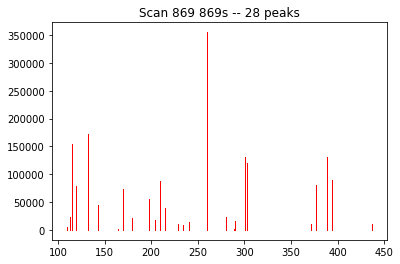

109.91698377990416 5483.41343878403
112.74795795975814 24018.66084182888
115.43731807368185 154176.0537802594
119.12569177465386 79734.47275895008
132.00478191033548 171593.33578216142
143.38462030763404 44969.70103279386
164.56242399284696 2020.2602560526648
170.08517314440897 73582.46573661674
179.11152196683 21141.03127905505
197.39407810742824 17780.769842096073
197.58849691081906 56405.64169504389
203.60316831686063 17290.017049257145
209.19985410608018 87069.25540277176
214.67051608091413 40043.40811075134
228.92994123942768 11229.828968808717
233.9328488822816 8161.897561279486
240.51072994611914 14315.6119707413
260.39042127548225 355086.0656007381
280.62539304469686 22757.953256771947
288.6298526556638 1636.4136470993983
289.8355667402181 16306.600850608957
300.74453726488775 131384.05745378984
302.5249982489637 120865.36309845428
371.9249270868998 10645.994015402392
376.9133982149136 80144.31881299095
388.7878001448405 131461.26957337264
394.3186619956672 90511.85448894804
43

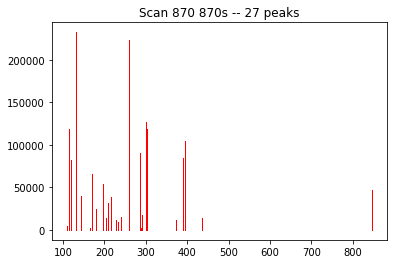

109.91699612388702 4585.86798995909
115.43725979733533 119302.93535708613
119.12570070710275 81703.01716726112
132.0044086443454 232620.50328131276
143.3847194964101 40261.032865858855
164.56225520611906 2096.125236108338
170.08519516702435 65990.71981526981
179.1114604394542 24745.155962345525
197.39481524699667 15887.726069117476
197.58835322968324 53885.799685906764
203.6031404597735 14408.948651938348
209.2001782038084 31216.998047145644
214.67052632240734 38348.24458339542
228.93016291926472 11565.217644084098
233.93293293926374 9304.043428802233
240.5107035360495 15221.756985613727
260.3903829774068 224069.1219235306
286.4609950072332 90047.98739409668
288.62983304909676 2467.1018500989053
289.83555491169955 17078.177395602983
300.7446830250254 127537.18198902714
302.5250110972357 118836.90879226648
371.9248917349684 11959.344144600791
388.7877679306484 84265.0542406566
394.3186340186069 105147.12363011335
436.40569055534365 13879.751934502521
845.4173735461733 47278.01606204819


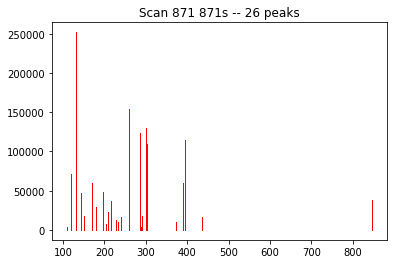

109.91700845920553 4190.066555281479
119.125860420676 70913.2547462173
132.00433681399556 251817.11689679654
143.38476322961372 46480.1686271234
149.92847550520653 17547.38429932689
170.08517200861021 59206.52544415438
179.11140925472424 29296.308562099603
197.39475041009632 11800.608498012767
197.58847774292158 48350.389330265236
203.6032057162942 6945.6991288959625
209.20052387216927 22886.284490700862
214.67054629464425 36641.524163851034
228.93006487082047 12836.18681711754
233.93286882670492 10160.354714666473
240.51053961944788 16168.311872418944
260.39040764804383 153551.82793574006
286.4609692669008 123707.2716815877
288.62984505443825 3615.8256902709936
289.8355667379877 17221.19385383244
300.74497279104395 130324.47035928028
302.5250017519201 109983.49547577486
371.9249390490428 10437.829825217008
388.7880785025805 59815.03067116974
394.3186155473809 114094.74068986443
436.40646560494685 15930.142615136949
845.4174150384615 38262.1389701383


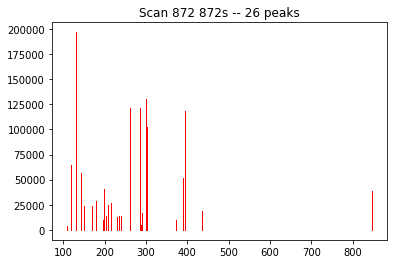

109.91702079452405 3644.2989088792324
119.1258898770007 64794.04670790682
132.00406652948752 196620.06498444092
143.3846944096699 57005.3486466177
149.92839505512234 24038.42151070463
170.08480343882596 23477.681615482667
179.1114424153113 28789.690256316742
197.3950988590237 10336.926009179344
197.58881848350077 41179.43306448345
203.60323030741267 13990.453370585541
209.1999897618962 24594.375333591106
214.6705829239939 27078.99804945586
228.93002749934027 13267.051220119558
233.93282408309236 14032.46366427604
240.51093276055096 13991.572081247446
260.3904210662997 121480.9304683324
286.4609798780197 121086.96780487006
288.6298198443914 4994.818429564682
289.8355763785138 17250.620794092083
300.74453086312275 130223.19684092335
302.5249846637174 101872.60323202747
371.9249682907837 10007.121586893558
388.78826965797964 51383.5437235464
394.31860054402773 118169.50956377905
436.40657055184255 19302.552576033064
845.4174068446821 38245.48123040887


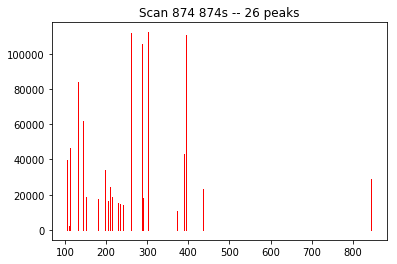

104.89115408116142 39837.21662863891
109.91699449769456 2475.0414517526247
112.67266220774356 46605.857726722475
132.00445295149026 83705.33748704368
143.38460418987472 61716.88371234347
149.92855189098967 18573.686722124643
179.11147102216265 17455.26410857125
197.39417130943943 6306.598502136979
197.58902244386593 34078.12965472211
203.6032745214012 16337.147512238453
209.20046289441512 24501.049586308633
214.67065275760459 18908.037691199213
228.93009055105483 15351.686556920626
233.93275679338626 14559.569806245598
240.5106644325024 14224.63948394998
260.3903659587544 111798.651520564
286.46098216343916 105783.55421122385
288.6298332117117 7112.829590137138
289.83555170611544 18115.438472815935
300.744721714403 108644.97659949625
302.5249846637174 112235.54625328645
371.92489155304634 10919.322790582086
388.78841474832916 43310.90416362951
394.3186001963956 110480.29507702145
436.405332907069 23157.101294401353
845.4173900886722 29038.783221502174


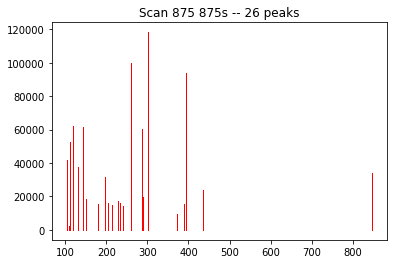

104.891121623762 42069.96151737477
109.91699221588559 2092.6680354417217
112.67267268768104 52548.305650333736
117.9315117601332 62109.94793755835
132.00416910118633 37819.52959978913
143.384583294706 61698.836223697646
149.92877303286005 18413.56771279891
179.1114731168319 15737.876690059196
197.39488658602284 3441.3322970339827
197.58915640722674 31491.924156781777
203.60332041216452 15822.748790635234
214.67058731924283 15184.944346580414
228.92985497676707 17195.851549372455
233.93269551310914 16274.385326885444
240.51064154011792 14495.739302363976
260.39018107843447 99764.47648872239
286.46102922911575 60173.59011058835
288.62984526446763 8658.727313279624
289.8355381176421 19485.27136704129
300.7450279404717 101258.57178147064
302.525014250219 118223.7857514729
371.92490560395623 9801.494224780066
388.7880883571191 15796.484602270493
394.3185691143322 94091.67424526466
436.40581692892704 23988.36802515441
845.4174659087417 33916.7352822282


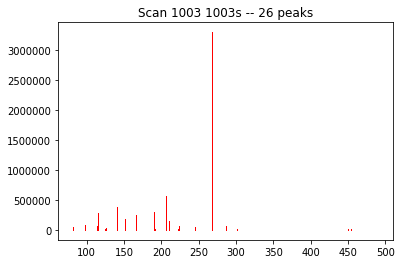

82.17280763394155 40851.71022713936
98.23976929195538 87436.56324795043
113.14594545254376 58320.4256882664
115.15589495633395 288161.3354796291
123.98572387527757 9965.151384312947
125.62267283286401 33863.34598348703
140.57601400528 379747.7556096987
151.41476532084573 182626.52418341197
165.36733039368045 242100.56360272845
190.51751438082115 300756.1818792825
191.51755131188963 22739.498576806254
205.76603085964067 561064.853345278
210.68331647196158 145143.50158312343
218.85590669613663 6569.967916156631
222.01991315986925 11058.764208645038
223.70407285667343 60938.337106993495
225.9246381828883 2887.366775597246
244.51567299391837 44753.98513216679
268.2648701828456 3289866.7437247206
286.04036991817475 66349.52103596988
301.89772584979085 19309.127890771226
342.3597428498234 4345.523428767818
347.64129519732273 1897.2285685310476
450.6291771178814 23429.412548977492
454.14705714999224 10409.862658158976
489.9757278664963 5570.407813691199


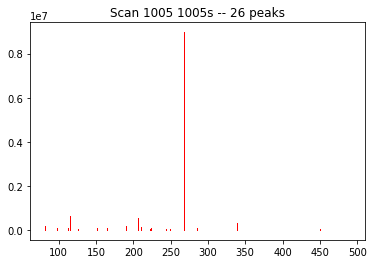

82.1725368557438 162337.0711262068
98.24009247044113 92480.62433484381
113.1458523641485 68767.21400681784
115.15596844169052 626885.9098778114
123.98543961296977 8202.423184635058
125.62270100787663 40536.56464498784
151.41468600452018 82809.75364805717
165.36739760655678 77078.57701513973
190.51774711269908 172665.87253726023
196.42181722273773 8733.848539750454
205.76599332091797 546229.3174660795
210.68320774421895 149665.1734996025
218.855022958572 7391.778522249333
222.0199797318922 27178.1383084552
223.70407168461952 71391.40453895892
225.92474968942366 1885.9081849204433
244.51562183788326 60534.48352616796
249.8015327868572 30761.152551311032
268.2646737160737 8968218.156803668
286.0404103081853 71086.61729153614
338.5974847414948 296493.7326707842
342.35975734230954 4688.679777652055
347.64130729497487 3470.606658298504
450.6290889636457 50396.878084331416
454.1471927117619 10498.002474230858
489.97568380425923 7163.37323927877


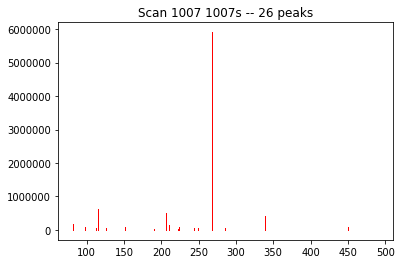

82.1727556197446 179319.32844660492
98.24000323548039 78852.52201662173
113.14589800515908 49020.83716853242
115.15604165748292 614017.4406651098
123.98549331276509 8212.22446143
125.62247804940735 44053.31945307465
151.41476509661834 78535.46642682249
190.517621473523 38457.34655646715
196.4220080784928 11411.361422598242
205.7660415998365 504161.1046371519
210.68334603982404 154107.63772767523
218.85551459233182 9353.282313279698
222.0197702506942 27206.273266859807
223.70411516320365 92533.00063325724
225.92478604491666 2241.962230611964
244.51569272068045 65654.02992349282
249.80168396157094 60841.08666944407
268.2647267016723 5908647.497069348
286.0403513077682 43265.72855601632
338.5975240992354 413971.99387305934
342.35972784885763 4375.387113263402
347.64130171704244 5488.63836535452
352.00906600924833 2642.212895153413
450.6291488810151 88849.06963160796
454.14743200275615 10428.00783160231
489.9758547002638 7988.990104192523


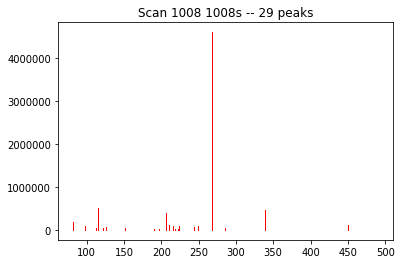

82.17276496573774 193774.1877676618
98.23995397951917 83412.02302833222
113.14583983389521 36197.0098524152
115.15610559549239 520266.9580944548
121.61115245654143 37863.48259039835
123.98541965811098 8253.73525032117
125.62296958313424 57919.86730857238
151.4147534963031 46230.68412086757
172.0173045237846 397.1894770048095
190.51739391858314 32648.380612870187
196.42197280609477 11298.477814470341
205.76604906575602 400968.2643771107
210.683080614019 125547.23496481504
215.86234317217796 102059.66173364551
218.85545341460957 11089.661436302134
222.0197644414145 25136.05621210026
223.7041861483453 93622.7312599675
225.92475840218296 3247.680777877386
244.51566041197322 67002.2673920471
249.801549803319 82583.51097043001
268.26516969877395 4593168.651983476
286.0403117194764 49347.318615296615
338.5974624724623 462125.5408338082
342.3597399016136 4642.04930416982
347.64132005585816 7281.834985442155
352.0089854041523 4744.233105771262
450.629093190667 104211.40217410093
454.14737185348

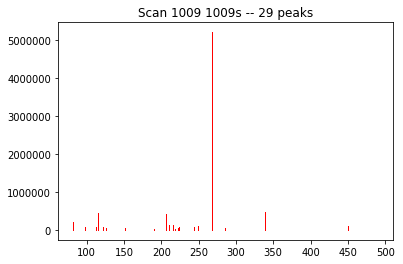

82.17272519958689 218557.29092973462
98.24011369309245 78900.89225059969
113.14580309523791 75761.53868885413
115.15591159276043 433918.8976102776
121.61126723135342 72758.2878647787
123.9854090953917 4829.304250256861
125.62267281441304 55915.2137773597
151.41474322607732 44436.743723385865
172.0175133337748 338.0481061206559
190.51806149060423 30667.93024123443
196.42186156483842 10283.086023528522
205.76606382916387 422826.16448745667
210.68284635283646 118737.50217500268
215.86210210375586 121675.2661143544
218.85550124780397 11117.450946583509
222.01998558328484 45537.80691907636
223.70403177256472 89069.20786849066
225.92473075944926 4253.399325142807
244.5156736187555 79104.91068674513
249.80155235559616 97693.44780442922
268.26496853639406 5198352.004625519
286.04037145561784 59305.129853045044
338.5974473357002 475580.03668855486
342.35974208351956 4212.307587361848
347.6413219292417 9428.402257545542
352.008311912773 9343.751993558342
450.62906424001943 107970.71782008263
454

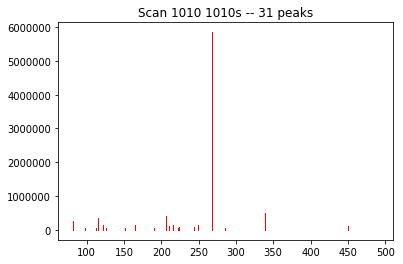

82.17275779604594 249033.55472291596
98.23994988258254 50759.246156831694
98.70771508093497 10286.79398531788
113.14581393251984 65345.143529275214
115.15559201470153 349638.0906698859
121.61035972384376 148374.8058403633
123.98517221594872 3975.364943961348
125.62248708877085 53242.34895375137
151.41475233739536 45720.66635007008
165.21517291216986 153556.8787649412
172.01734486134026 757.7019900393886
190.51777949694323 59641.91221831835
196.42181261924418 11558.972177613095
205.76599005580826 406355.31250255846
210.68296960638247 122373.821636328
215.86190069761724 132106.83642357495
218.8555504402131 10001.245373614898
222.01989916183777 42564.66782066589
223.70398363758372 74441.50181434919
225.92470368773155 5210.4108647018675
244.51569511410682 98490.60729790476
249.80157680878366 140880.43434907275
268.2647530167746 5846343.711527207
286.04049163009347 52837.82694500329
338.59740291735994 496996.4344664467
342.3597464149547 3820.776568011285
347.64126233703087 11728.39893230077

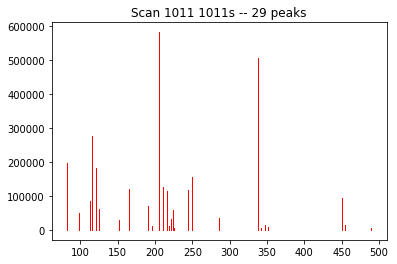

82.17273310544887 197399.72766714336
98.2398479240885 49966.170924267935
98.7076184471341 11543.232919693099
113.14581729016041 84616.74704695301
115.15556732410448 276876.81946625427
121.61120730007941 182192.17576517523
125.62305073500136 60560.419760120465
151.41477469569003 30080.889889999915
165.21480957071086 121549.53527662363
172.01731829742738 808.8854366893038
190.51775551365566 70579.8457150822
196.42189339136632 12230.604664816115
205.76597745387897 582890.6776384626
210.68307058875294 127889.68715820863
215.86205383576765 114818.10323676669
218.8554177279359 12035.279328369177
222.02015348418433 32106.755459105407
223.70361105918346 59489.734149227676
225.924691421824 4904.503805156714
244.5156736228547 119043.05688678604
249.80166408519435 155768.95860622296
286.04044264409055 35642.696238307624
338.59735786691914 506735.5570761976
342.35977048244604 4304.760328177719
347.641286868846 14020.244805239696
352.00819162051124 9441.895815638065
450.62915657210146 93702.6255487

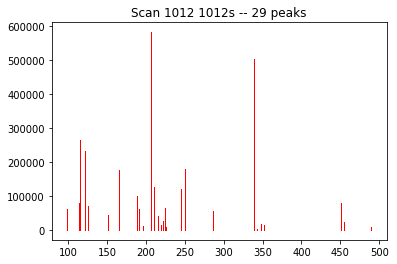

98.2397896214824 60948.085375492556
98.7076184471341 13573.562423075859
113.14590869891762 79374.63747678777
115.15564708513459 265652.3363849391
121.61118034047615 231799.135004868
125.62295189264347 70941.42202115599
151.4147562672013 43312.212032224015
165.21473579735468 175825.35185498567
172.01736771488558 1019.5964582464188
187.7097908148281 98694.52725437217
190.51775582480576 60628.37630243787
196.42196013015314 11616.64098188412
205.76599882514833 581052.70186059
210.6830530125644 125466.49751127382
215.86229895687774 41890.373562558096
218.85531915813195 13339.8521615474
222.02038207487823 25557.493926288833
223.70362027932669 63842.39493782202
225.9246794221386 7510.853820123609
244.51567299391837 120159.18246435959
249.80171532925965 178103.6532852911
286.0403949230921 55627.76852420491
338.59733142047776 503492.447500414
342.35973962582926 3850.542880960975
347.6413664435614 16651.476740254766
352.0080851433448 13734.135986019775
450.6291148746433 77676.83004712297
454.147

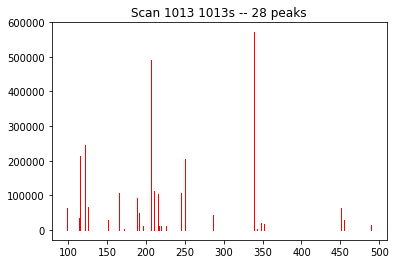

98.2398141532983 64684.78162306494
98.70771542594935 13164.207365044354
113.14609872119722 34994.802012232125
115.15625800123931 213724.40260789273
121.61106797409356 245738.59230982926
125.62252166039269 66791.85886258607
151.41471511899172 29723.388238555788
165.21384593404986 107344.84179780298
172.01742222302843 1416.2790591462049
187.70976715779088 93263.52554819977
190.51756816820966 47510.585056663505
196.4219614671334 10816.194684653976
205.76603902891043 490291.62623835343
210.68302176514385 111164.1172111361
215.86186329547357 103749.94996646245
216.95553002337417 11965.857482761543
218.8553576950742 12643.487614234999
225.92468625861716 11715.381563412564
244.51572645946538 105726.32370272125
249.80172442969385 204097.74062398917
286.04041066317586 41960.74858184991
338.59729450405194 570885.0256303909
342.35975401569783 3684.6252038313564
347.6413961167402 20398.674034692685
352.0080851433448 17811.930278725784
450.6290889636457 62269.32123117797
454.1473751973588 29989.757

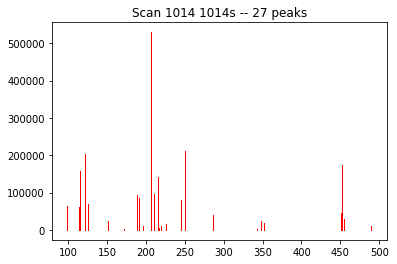

98.23981795850948 63394.561350839416
98.7077710350241 14415.689818809362
113.1459507349305 61678.0376513063
115.15651302182536 157977.9757375464
121.61149673047302 203701.0678052323
125.62258068665419 68815.1427195687
151.4147302498845 24799.4496659274
172.01738725254106 1647.3417680454986
187.70976871691502 93782.37279353957
190.5176666120105 85222.59583735498
196.42191247606047 10789.908888457643
205.76608731621752 529447.1622607402
210.68302559470928 95146.45405893528
215.86179535739373 141467.2084796993
216.95562870592227 5564.642990947143
218.85549476482393 11600.523510281753
225.924700797174 16060.252244433645
244.51580612938488 80127.31982224528
249.80167552331883 210118.93322827164
286.0405348664786 38950.80894020548
342.35978312470087 3783.2148386805475
347.64136865217574 24511.842307687028
352.00804633546676 18480.912235907384
450.62909631317797 45420.929150522075
451.5123065237234 174364.6739236964
454.14749837045974 29758.204315163333
489.9758700226557 10188.759282118555
Ac

In [16]:
controller = SimpleMs1Controller(column)
controller.run(max_rt)